In [1]:
%cd ..

d:\Code\WRSN\Code\load_balancing\multi_agent_rl_wrsn


C:\Users\lelam\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
%ls

 Volume in drive D is D:
 Volume Serial Number is 06DC-43C8

 Directory of d:\Code\WRSN\Code\load_balancing\multi_agent_rl_wrsn

05/07/2024  10:10 PM    <DIR>          .
05/07/2024  10:10 PM    <DIR>          ..
05/07/2024  09:59 PM            12,387 clusters.json
05/03/2024  04:20 PM                 1 listTargets.json
05/07/2024  10:10 PM            27,386 output.png
04/14/2024  07:30 AM    <DIR>          physical_env
05/07/2024  10:13 PM    <DIR>          runner
               3 File(s)         39,774 bytes
               4 Dir(s)  199,677,607,936 bytes free


Danh sách các thư mục hiện tại:
.git
physical_env
runner
Danh sách các thư mục hiện tại:
.git
physical_env
runner
Danh sách các thư mục hiện tại:
.git
physical_env
runner


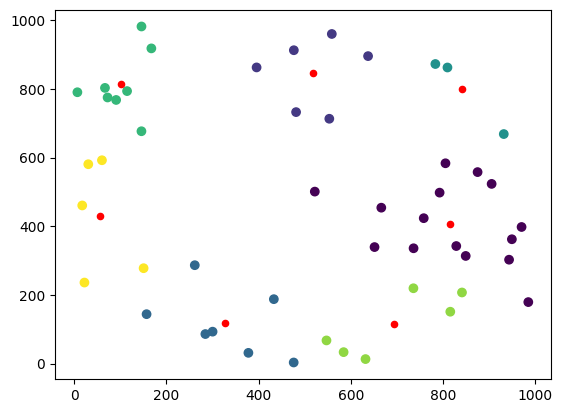

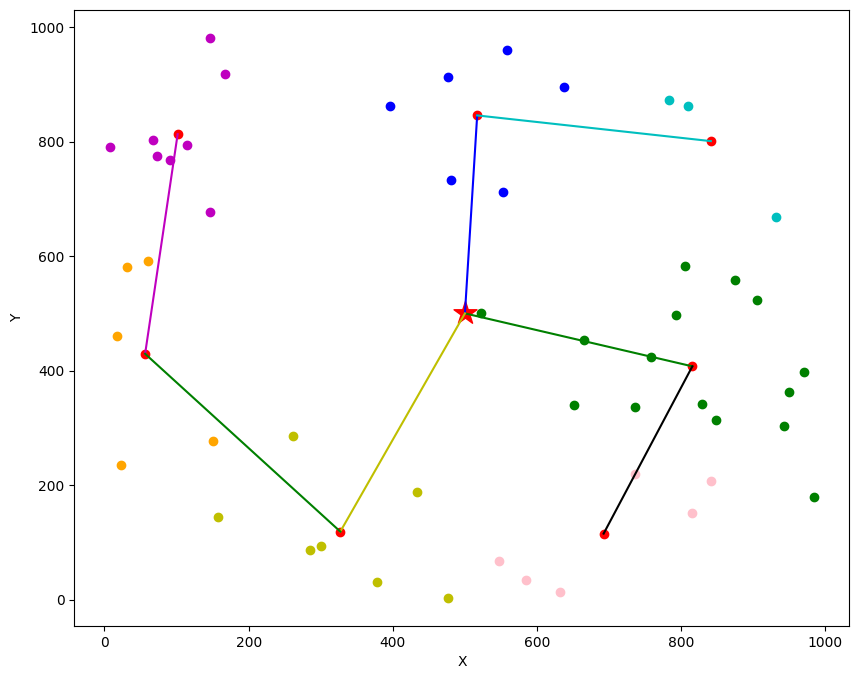

0 [815.46245681 407.51789364]
1 [516.97839024 845.6840617 ]
2 [327.14494467 118.95092308]
3 [841.17383867 800.79863601]
4 [101.51174802 812.94619655]
5 [692.38453355 115.41231989]
6 [ 56.37522402 429.38784632]
29


In [3]:
import sys
import os
# sys.path.append(os.path.dirname(os.path.dirname(__file__)))
from physical_env.network.NetworkIO import NetworkIO


netIO = NetworkIO("physical_env/network/network_scenarios/bacgiang_50.yaml")
env, net = netIO.makeNetwork()



In [4]:
for node in net.listNodes:
    print(node.location, type(node))

[716.9527081687173, 457.52833947501165] <class 'Nodes.RelayNode.RelayNode'>
[638.4429595300196, 472.8977691550129] <class 'Nodes.RelayNode.RelayNode'>
[569.2214797650098, 486.4488845775064] <class 'Nodes.RelayNode.RelayNode'>
[543.9677097104427, 766.749137920126] <class 'Nodes.RelayNode.RelayNode'>
[530.9570291817529, 687.8142141399616] <class 'Nodes.RelayNode.RelayNode'>
[517.946348653063, 608.8792903597971] <class 'Nodes.RelayNode.RelayNode'>
[508.9731743265315, 554.4396451798985] <class 'Nodes.RelayNode.RelayNode'>
[346.0589849361961, 223.48970364440137] <class 'Nodes.RelayNode.RelayNode'>
[384.97302519763457, 293.387468061664] <class 'Nodes.RelayNode.RelayNode'>
[423.887065459073, 363.2852324789266] <class 'Nodes.RelayNode.RelayNode'>
[461.9435327295365, 431.64261623946334] <class 'Nodes.RelayNode.RelayNode'>
[802.8345317777536, 817.0144614679868] <class 'Nodes.RelayNode.RelayNode'>
[724.4952248832965, 833.2302869263492] <class 'Nodes.RelayNode.RelayNode'>
[646.1559179888394, 849.4

<Cluster.Cluster object at 0x00000292679E9DD0> 0
<Cluster.Cluster object at 0x000002926CE5DF90> 1
<Cluster.Cluster object at 0x0000029269E457D0> 2
<Cluster.Cluster object at 0x0000029267AA1A50> 3
<Cluster.Cluster object at 0x000002926CE789D0> 4
<Cluster.Cluster object at 0x000002926CE62750> 5
<Cluster.Cluster object at 0x000002926CE94510> 6


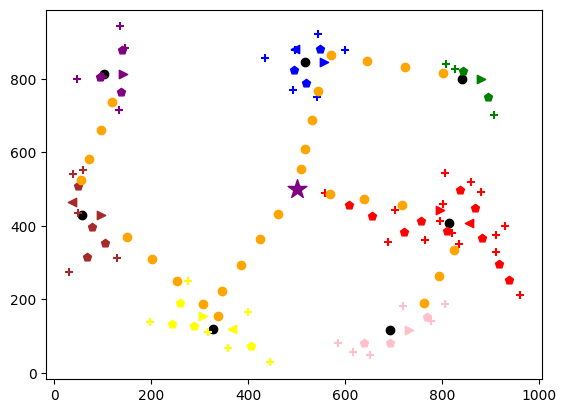

In [5]:
import matplotlib.pyplot as plt


  

plt.figure() 

colors = ['red', 'blue', 'yellow', 'green', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'olive', 'navy', 'beige', 'indigo', 'turquoise']
shapes = ['<', '>', '+', 'p', 'x', '*', '^', 'v', 'h', 's', 'p', 'o']

plt.scatter(net.baseStation.location[0], net.baseStation.location[1], marker= "*", color = "purple",s = 200)
for j in range(0,len(net.listClusters)):
 print(net.listClusters[j],j)
 plt.scatter(net.listClusters[j].centroid[0],net.listClusters[j].centroid[1],color = "black")
 for i in range(0,len(net.listClusters[j].listNodes)):
    x = net.listClusters[j].listNodes[i].location[0]
    y = net.listClusters[j].listNodes[i].location[1]
    z = net.listClusters[j].listNodes[i].__class__.__name__
    if(z == "InNode"): marker_ = shapes[0]
    if(z == "OutNode"):  marker_ = shapes[1]
    if(z == "SensorNode"): marker_ = shapes[2]
    if(z == "ConnectorNode"):  marker_ = shapes[3]
    plt.scatter(x, y, color = colors[j] , marker = marker_)
 for i in range(0,len(net.listClusters[j].listTargets)):
    x = net.listClusters[j].listTargets[i].location[0]
    y = net.listClusters[j].listTargets[i].location[1]
    #plt.scatter(x, y, color = "black")

test_list = []
for node in net.listNodes:
    if node.__class__.__name__ == "RelayNode":
        test_list.append(node)

for node in test_list:
   x = node.location[0]
   y = node.location[1]
   plt.scatter(x, y, color = "orange")




plt.show()

